In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv('_imports.csv')

In [3]:
df.head()

,Month,TotalAirportsCIF,TotalParcelPostCIF,TotalSeaportsCIF,TotalAirportsWeight,TotalParcelPostWeight,TotalSeaportsWeight
0,2000M01,394427,4434,1346468,4831,50,903462
1,2000M02,592551,9523,1631598,7205,13,1276569
2,2000M03,621641,6081,1801851,7591,10,1167420
3,2000M04,515741,4847,1657750,6252,13,1242467
4,2000M05,608863,4658,1690275,7512,12,1086912


In [4]:
df.tail()

,Month,TotalAirportsCIF,TotalParcelPostCIF,TotalSeaportsCIF,TotalAirportsWeight,TotalParcelPostWeight,TotalSeaportsWeight
162,2013M07,1033318,1696,3515177,8535,11,1732203
163,2013M08,813380,1720,3716881,8099,10,1754603
164,2013M09,877831,1614,3228541,8279,9,1659500
165,2013M10,880170,4438,3539526,8605,12,1763979
166,2013M11,1048426,1939,3223875,9029,13,1586650


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Month                  167 non-null    object
 1   TotalAirportsCIF       167 non-null    int64 
 2   TotalParcelPostCIF     167 non-null    int64 
 3   TotalSeaportsCIF       167 non-null    int64 
 4   TotalAirportsWeight    167 non-null    int64 
 5   TotalParcelPostWeight  167 non-null    int64 
 6   TotalSeaportsWeight    167 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 9.3+ KB


In [6]:
df.shape

(167, 7)

In [7]:
df.dtypes.value_counts()

int64     6
object    1
dtype: int64

In [8]:
df['Month'] = df['Month'].str.replace('M','')

,Month,TotalAirportsCIF,TotalParcelPostCIF,TotalSeaportsCIF,TotalAirportsWeight,TotalParcelPostWeight,TotalSeaportsWeight
0,200001,394427,4434,1346468,4831,50,903462
1,200002,592551,9523,1631598,7205,13,1276569
2,200003,621641,6081,1801851,7591,10,1167420
3,200004,515741,4847,1657750,6252,13,1242467
4,200005,608863,4658,1690275,7512,12,1086912
...,...,...,...,...,...,...,...
162,201307,1033318,1696,3515177,8535,11,1732203
163,201308,813380,1720,3716881,8099,10,1754603
164,201309,877831,1614,3228541,8279,9,1659500
165,201310,880170,4438,3539526,8605,12,1763979


In [10]:
df['Month'] = pd.to_datetime(df['Month'], format='%Y%m', errors='coerce').dropna()

,Month,TotalAirportsCIF,TotalParcelPostCIF,TotalSeaportsCIF,TotalAirportsWeight,TotalParcelPostWeight,TotalSeaportsWeight
0,2000-01-01,394427,4434,1346468,4831,50,903462
1,2000-02-01,592551,9523,1631598,7205,13,1276569
2,2000-03-01,621641,6081,1801851,7591,10,1167420
3,2000-04-01,515741,4847,1657750,6252,13,1242467
4,2000-05-01,608863,4658,1690275,7512,12,1086912
...,...,...,...,...,...,...,...
162,2013-07-01,1033318,1696,3515177,8535,11,1732203
163,2013-08-01,813380,1720,3716881,8099,10,1754603
164,2013-09-01,877831,1614,3228541,8279,9,1659500
165,2013-10-01,880170,4438,3539526,8605,12,1763979


In [12]:
data = df[["Month", "TotalSeaportsWeight"]]

In [13]:
data.set_index(df['Month'], inplace = True)
data = data.drop('Month',axis=1)

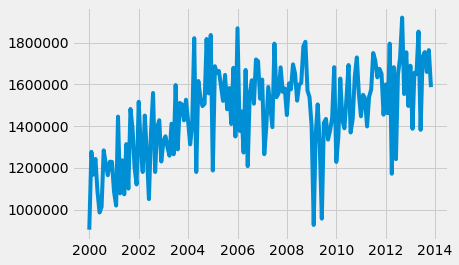

In [14]:
plt.plot(data)

In [15]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [19]:
test_result=adfuller(data['TotalSeaportsWeight'])

In [20]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("is stationary")
    else:
        print("is non-stationary ")

In [21]:
adfuller_test(data['TotalSeaportsWeight'])

ADF Test Statistic : -2.0201115169610806
p-value : 0.2778251099275517
#Lags Used : 10
Number of Observations Used : 156
is non-stationary 


# We Difference due to Non-Stationarity

In [24]:
data['First Difference'] = data['TotalSeaportsWeight'] - data['TotalSeaportsWeight'].shift(1)

In [25]:
data

,TotalSeaportsWeight,First Difference
Month,,
2000-01-01,903462,NaN
2000-02-01,1276569,373107.0
2000-03-01,1167420,-109149.0
2000-04-01,1242467,75047.0
2000-05-01,1086912,-155555.0
...,...,...
2013-07-01,1732203,350272.0
2013-08-01,1754603,22400.0
2013-09-01,1659500,-95103.0


In [26]:
data['Seasonal First Difference']=data['TotalSeaportsWeight']-data['TotalSeaportsWeight'].shift(12)

In [27]:
data

,TotalSeaportsWeight,First Difference,Seasonal First Difference
Month,,,
2000-01-01,903462,NaN,NaN
2000-02-01,1276569,373107.0,NaN
2000-03-01,1167420,-109149.0,NaN
2000-04-01,1242467,75047.0,NaN
2000-05-01,1086912,-155555.0,NaN
...,...,...,...
2013-07-01,1732203,350272.0,83895.0
2013-08-01,1754603,22400.0,29073.0
2013-09-01,1659500,-95103.0,-260195.0


In [29]:
## Again test dickey fuller test
adfuller_test(data['Seasonal First Difference'].dropna())

ADF Test Statistic : -4.7894152396362415
p-value : 5.697912949625423e-05
#Lags Used : 11
Number of Observations Used : 143
is stationary


#Now we have stationary data.

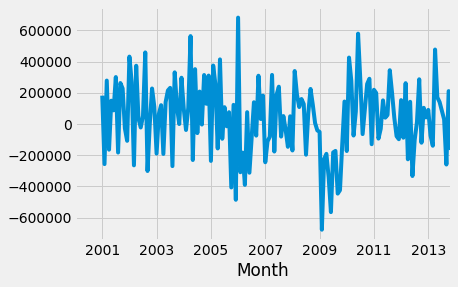

In [30]:
data['Seasonal First Difference'].plot()

# Plot Autocorrelation and Partial-Autocorrelation

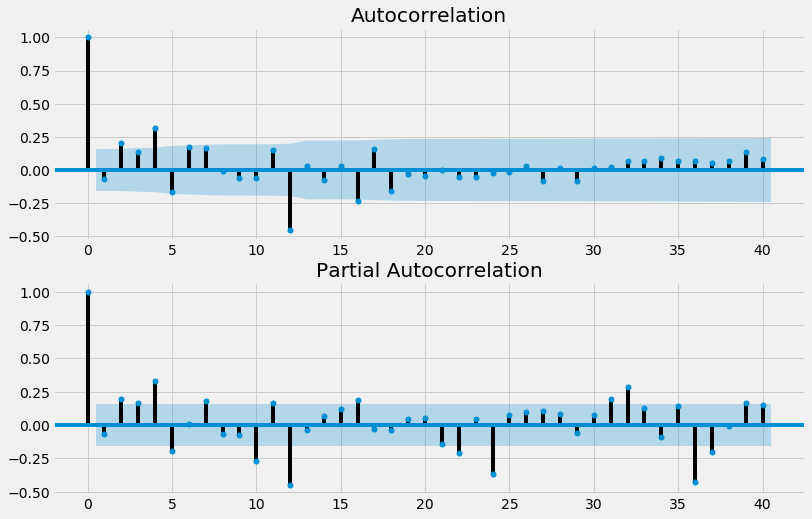

In [35]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(data['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(data['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

In [36]:
# We apply ARIMA on non-seasonal data:

from statsmodels.tsa.arima_model import ARIMA

In [40]:
model=ARIMA(data['TotalSeaportsWeight'],order=(1,1,1))
model_fit=model.fit()

C:\Users\siddh\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\siddh\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [41]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               ARIMA Model Results                               
=================================================================================
Dep. Variable:     D.TotalSeaportsWeight   No. Observations:                  166
Model:                    ARIMA(1, 1, 1)   Log Likelihood               -2232.497
Method:                          css-mle   S.D. of innovations         166982.981
Date:                   Wed, 02 Sep 2020   AIC                           4472.993
Time:                           11:17:44   BIC                           4485.441
Sample:                       02-01-2000   HQIC                          4478.046
                            - 11-01-2013                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                        3024.2487   2155.715      1.403      0.161   -1200.874    7249.371
ar.L1.D.TotalSeaportsWeight    -0.2023      0.092     -2.207      0.027      -0.382      -0.023
ma.L1.D.TotalSeaportsWeight    -0.8056      0.062    -12.941      0.000      -0.928      -0.684
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -4.9433           +0.0000j            4.9433            0.5000
MA.1            1.2413           +0.0000j            1.2413            0.0000
-----------------------------------------------------------------------------
"""

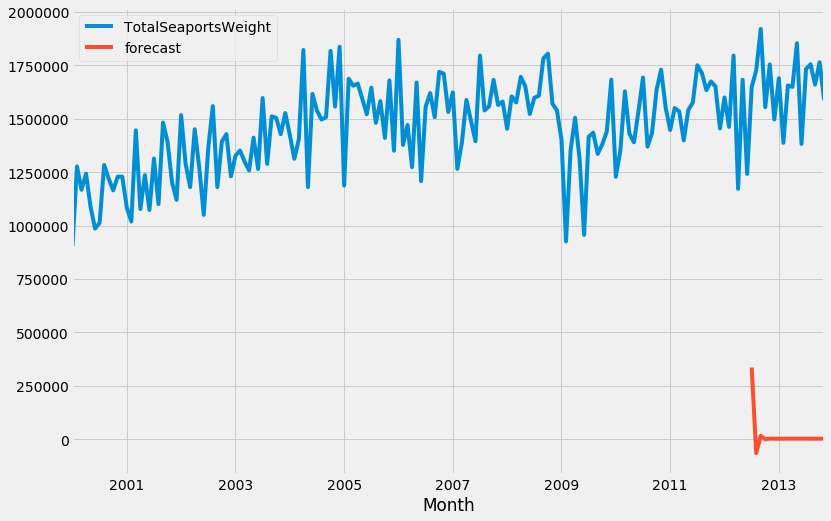

In [53]:
data['forecast']=model_fit.predict(start=150,end=166,dynamic=True)
data[['TotalSeaportsWeight','forecast']].plot(figsize=(12,8))

Not working well because we have a seasonal data. Use SARIMAX instead

In [54]:
import statsmodels.api as sm

In [61]:
model=sm.tsa.statespace.SARIMAX(data['TotalSeaportsWeight'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

C:\Users\siddh\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\siddh\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


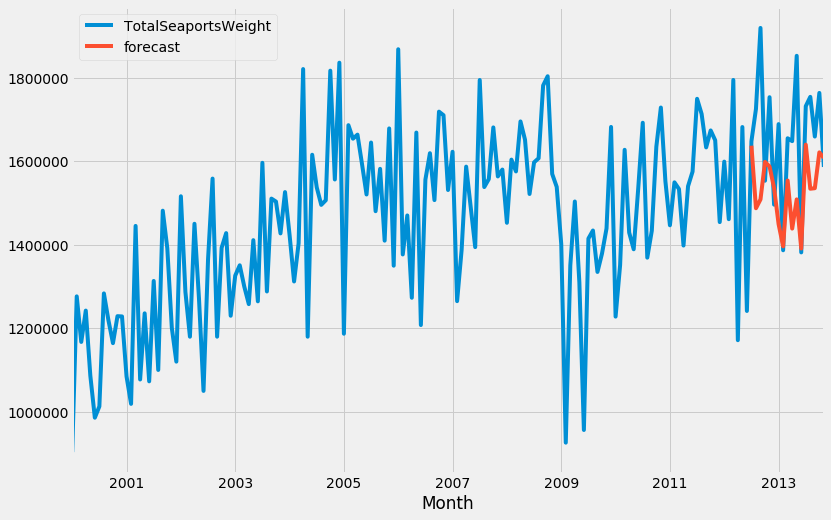

In [62]:
data['forecast']=results.predict(start=150,end=166,dynamic=True)
data[['TotalSeaportsWeight','forecast']].plot(figsize=(12,8))

In [63]:
from pandas.tseries.offsets import DateOffset
future_dates=[data.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [64]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=data.columns)

In [65]:
future_datest_df.tail()

,TotalSeaportsWeight,First Difference,Seasonal First Difference,forecast
2015-06-01,NaN,NaN,NaN,NaN
2015-07-01,NaN,NaN,NaN,NaN
2015-08-01,NaN,NaN,NaN,NaN
2015-09-01,NaN,NaN,NaN,NaN
2015-10-01,NaN,NaN,NaN,NaN


In [66]:
future_df=pd.concat([data,future_datest_df])

In [67]:
future_df

,TotalSeaportsWeight,First Difference,Seasonal First Difference,forecast
2000-01-01,903462,NaN,NaN,NaN
2000-02-01,1276569,373107.0,NaN,NaN
2000-03-01,1167420,-109149.0,NaN,NaN
2000-04-01,1242467,75047.0,NaN,NaN
2000-05-01,1086912,-155555.0,NaN,NaN
...,...,...,...,...
2015-06-01,NaN,NaN,NaN,NaN
2015-07-01,NaN,NaN,NaN,NaN
2015-08-01,NaN,NaN,NaN,NaN
2015-09-01,NaN,NaN,NaN,NaN


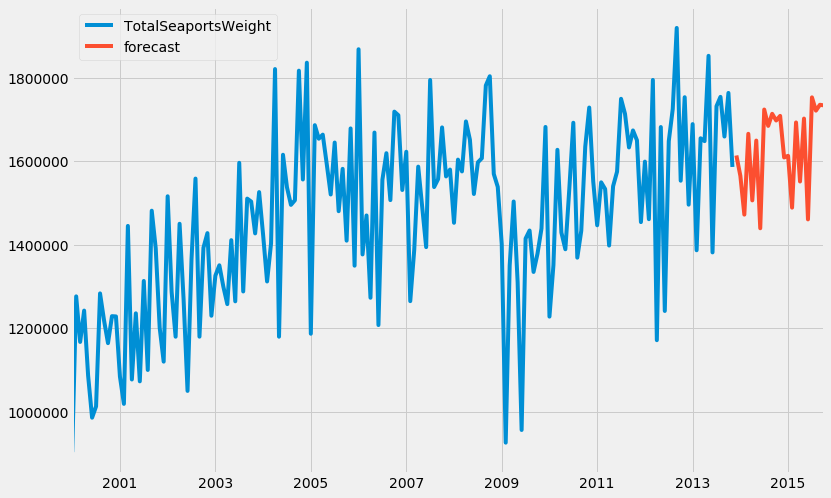

In [68]:
future_df['forecast'] = results.predict(start = 167, end = 200, dynamic= True)  
future_df[['TotalSeaportsWeight', 'forecast']].plot(figsize=(12, 8))